<a href="https://colab.research.google.com/github/mohammed893/Tensor_Flow_Cheat_sheet-/blob/main/NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to NN classification with TensorFlow


#Creating data to view and Fit


In [1]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples = 1000
#Create circles
x , y = make_circles(n_samples ,
                     noise = 0.03,
                     random_state = 42)



Let's visualize the Data

In [2]:
import pandas as pd
circles = pd.DataFrame({"X0" : x[:, 0] , "X1" :x[:,1] , "label" :y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


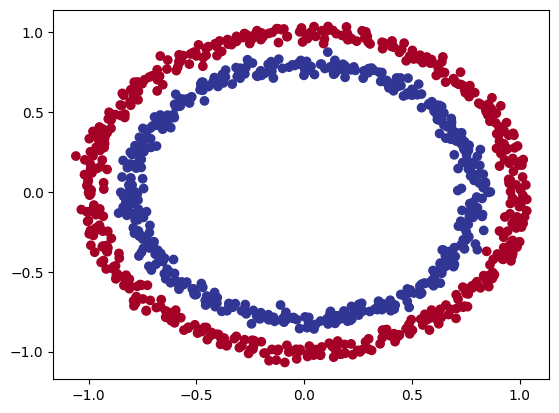

In [3]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0] , x[:,1] , c = y , cmap=plt.cm.RdYlBu)

In [4]:
import tensorflow as tf

In [ ]:

#Steps in modelling
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
                optimizer = tf.keras.optimizers.SGD() ,
                metrics = ["accuracy"])

model_1.fit(x , y , epochs=5)



Epoch 1/5
32/32 [==============================] - 3s 13ms/step - loss: 6.4879 - accuracy: 0.5060
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 7.7128 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 7.7128 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 13ms/step - loss: 7.7128 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 13ms/step - loss: 7.7128 - accuracy: 0.5000


In [ ]:
model_1.fit(x , y, epochs=200)

In [ ]:
model_1.evaluate(x , y)

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = 'accuracy'
                )
model_2.fit(x , y , epochs = 100)

In [ ]:
model_2.evaluate(x , y)

In [ ]:
model_2.summary()

In [ ]:
#Improving Model
#.1 Create Model_3
model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100), #ADD 100 dense neurons
 tf.keras.layers.Dense(10), #Add another layer with 10 n
 tf.keras.layers.Dense(1)
])
#Compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy'
                )

#Fit the model
model_3.fit(x , y , epochs = 100)

In [ ]:
model_3.evaluate(x , y)

To Visualize our model's predictions we will create a Function `plot_decision_boundry`
* Take in the Model and X and Y
* Create a numpy mechGrid of the different X values
* Make preds across the meshgrid
* Plot preds

In [ ]:
import numpy as np


In [ ]:
x_min , x_max = x[:, 0].min() - 0.1 , x[:, 0].max() +0.1
y_min , y_max = x[:, 1].min() - 0.1 , x[:, 1].max() +0.1


In [5]:
def plot_dicision_boundary(model , x , y):
  """
  Plot the Decision Boundry created by a model predicting on X
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min , x_max = x[: , 0].min() - 0.1 , x[: , 0].max() +0.1
  y_min , y_max = x[: , 1].min() - 0.1 , x[: , 1].max() +0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max , 100) ,
                        np.linspace(y_min , y_max , 100))

  # Create X value(we 're going to make preds on these)
  x_in = np.c_[xx.ravel() , yy.ravel()] #Stack 2D Arrays Together
  #Make preds
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multi_class_classification")
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else:
    print("Binary class clasification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plot the decision boundary
  plt.contourf(xx , yy , y_pred , cmap = plt.cm.RdYlBu , alpha = 0.7)
  plt.scatter(x[: , 0] , x[: , 1] , c = y , s = 40 , cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min() , xx.max())
  plt.ylim(yy.min() , yy.max())






313/313 [==============================] - 1s 2ms/step
Binary class clasification


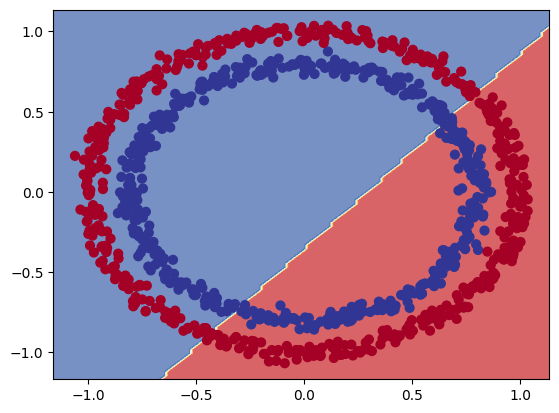

In [ ]:
#Check out the preds
plot_dicision_boundary(model = model_3 ,x = x , y = y)

In [ ]:
#The missing piece : Non-linearity
tf.random.set_seed(42)

model_4 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1 , activation = 'relu')
])

#Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"]
                )

#Fit the model



In [ ]:
history = model_4.fit(x, y , epochs= 100)



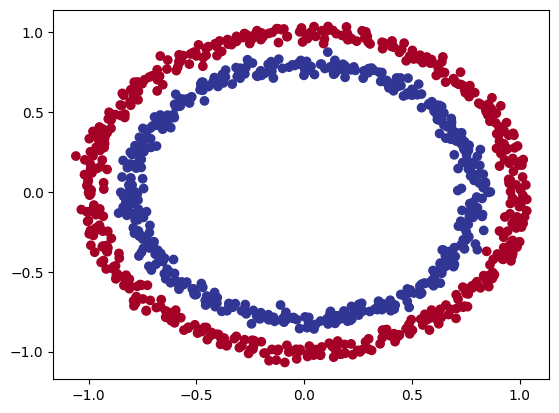

In [ ]:
#Check our data
plt.scatter(x[:,0] , x[:,1] , c = y , cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
Multi_class_classification


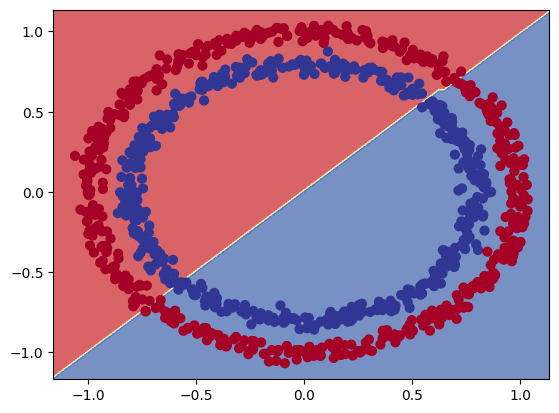

In [ ]:
plot_dicision_boundary(model = model_4 , x = x , y = y)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#.1 Create Model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = tf.keras.activations.relu)
])
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])
# 3. Fitting the model
history = model_5.fit(x , y , epochs = 100)

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#.1 Create Model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1 , activation= tf.keras.activations.sigmoid)
])
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ["accuracy"])
# 3. Fitting the model
history = model_6.fit(x , y , epochs = 400)

In [ ]:
#Evaluating
model_6.evaluate(x , y)

32/32 [==============================] - 1s 4ms/step - loss: 0.0319 - accuracy: 1.0000


[0.0319368951022625, 1.0]

313/313 [==============================] - 1s 1ms/step
Binary class clasification


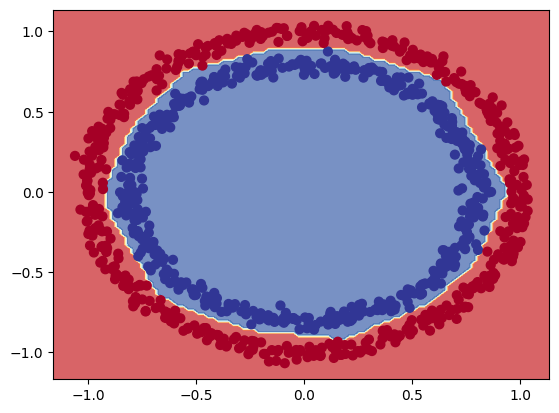

In [ ]:
import numpy as np
plot_dicision_boundary(model_6 , x , y)

In [ ]:
# Create a toy Tensor
a = tf.cast(tf.range(-10 , 10) , tf.float32)
a


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

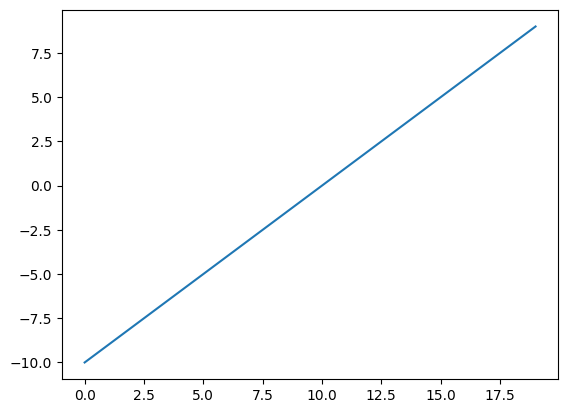

In [ ]:
#Visualize our Toy Tensor
plt.plot(a
         )

In [ ]:
# Let's start with replicating sigmoid ----   sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use the Sigmoid function on our toy tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

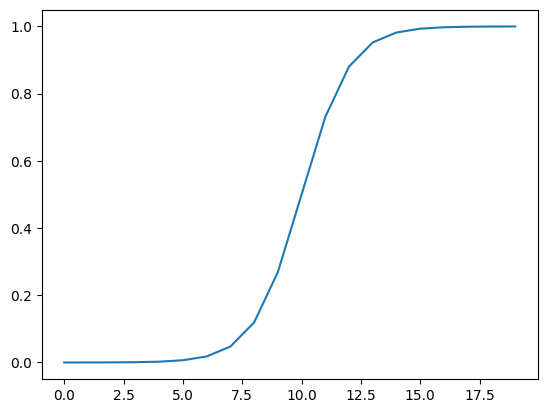

In [ ]:
#Plot our Toy tensor transormed by sigmoid
plt.plot(sigmoid(a));

In [ ]:
#Recreating Relu Function
def relu(x):
  return tf.maximum(0 , x)
#Pass our toy Tensor
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

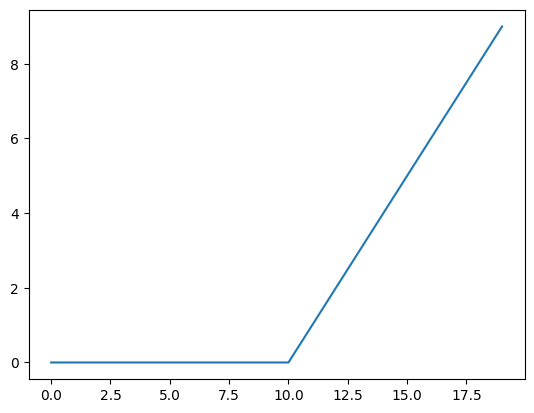

In [ ]:
plt.plot(relu(a))

In [6]:
 # Evaluating and improving our classification model
   ##Split into train and test sets
x_train , y_train = x[:800] , y[:800]
x_test , y_test = x[800:] , y[800:]
x_train.shape , x_test.shape , y_train.shape  , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [8]:
model_8.evaluate(x_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 1.0000


[0.07399830967187881, 1.0]

In [7]:
#Let's recreate a model to fit on the training data and evaluate on the test

#Set the random seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy' ,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])
history = model_8.fit(x_train , y_train , epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.4837
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5337
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.6200
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6762
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6605 - accuracy: 0.6175
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6187
Epoch 7/25
25/25 [==============================] - 0s 12ms/step - loss: 0.6142 - accuracy: 0.7212
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7900
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8475
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.9225
Epoch 11/25
25/25 

In [10]:
import numpy as np

313/313 [==============================] - 5s 13ms/step
Binary class clasification
313/313 [==============================] - 2s 6ms/step
Binary class clasification


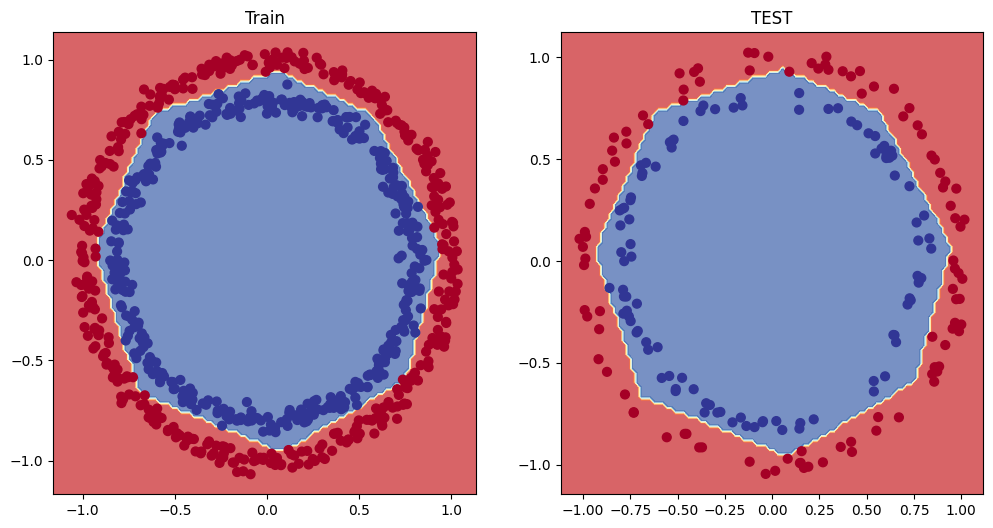

In [11]:
#Plot the decision boundary for the training and test sets
plt.figure(figsize = (12 , 6))
plt.subplot(1 , 2 , 1)
plt.title("Train")
plot_dicision_boundary(model_8 , x = x_train , y = y_train)
plt.subplot(1 , 2 , 2)
plt.title("TEST")
plot_dicision_boundary(model_8 , x = x_test , y= y_test)

In [ ]:
#Plot the loss (or training) curve
pd.DataFrame(history.history)

,loss,accuracy
0,0.691922,0.50125
1,0.677037,0.58625
2,0.667381,0.61500
3,0.657336,0.66125
4,0.645771,0.70000
5,0.629852,0.66875
6,0.610365,0.82375
7,0.589727,0.82500
8,0.561744,0.81750
9,0.531539,0.82500


Text(0.5, 1.0, 'Model_8_loss_curves')

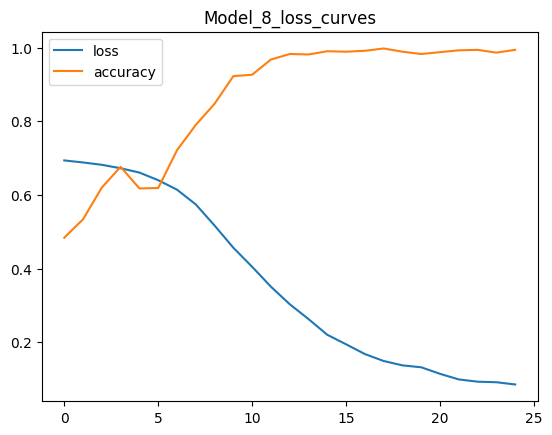

In [12]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8_loss_curves")

# Finding the ideal LR
* A learning rate **call back** - you can think of a call back as an extra piece of functionality , you can add to your model *while* its training
* Another model (we could use the same as above but iam practicing building model)
* A modeified loss curve plot

In [13]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])
model_9.compile(loss = 'binary_crossentropy' ,
                optimizer = 'Adam' ,
                metrics = ['accuracy'])
#Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )

#Fit the model
history_9 = model_9.fit(x_train , y_train , epochs = 100 , callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6955 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

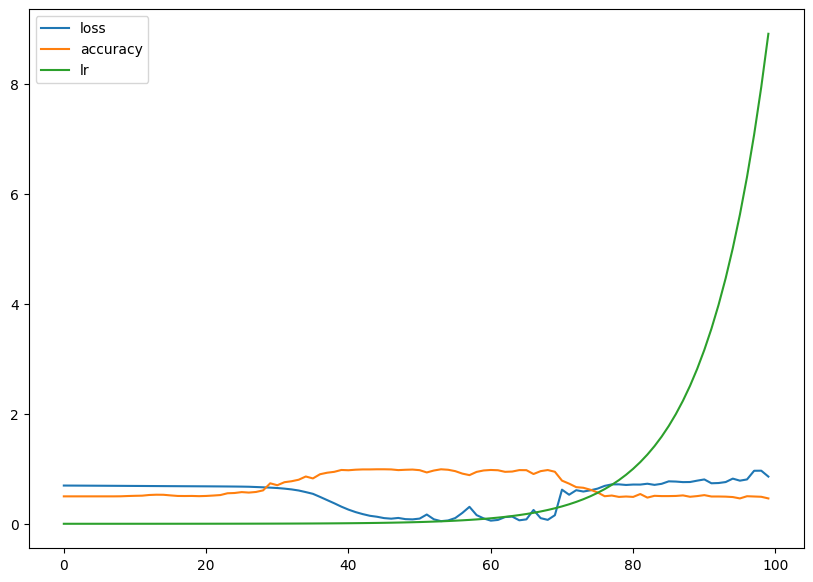

In [14]:
#Checking the history
pd.DataFrame(history_9.history).plot(figsize = (10 , 7))

Text(0, 0.5, 'Loss')

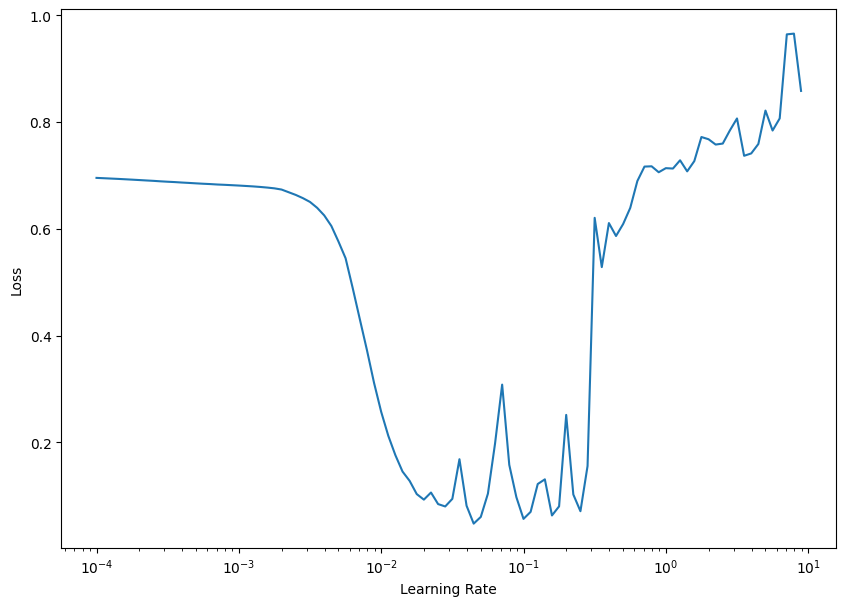

In [15]:
#Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))

plt.figure(figsize = (10 , 7))
plt.semilogx(lrs , history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [16]:
#Let's try using a higher ideal LR
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_10.compile(loss = 'binary_crossentropy' ,
                 optimizer = tf.keras.optimizers.Adam(learning_rate= 0.02) ,
                 metrics = ['accuracy'])
# LR_sch = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 **(epoch / 20))

history_10 = model_10.fit(x_train , y_train ,  epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.6842 - accuracy: 0.5938
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5938
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6538
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.7825
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7525
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7937
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4431 - accuracy: 0.8150
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8600
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8863
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3048 - accuracy: 0.8875
Epoch 11/

In [17]:
model_10.evaluate(x_test , y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9900


[0.03316090255975723, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
Binary class clasification
313/313 [==============================] - 0s 1ms/step
Binary class clasification


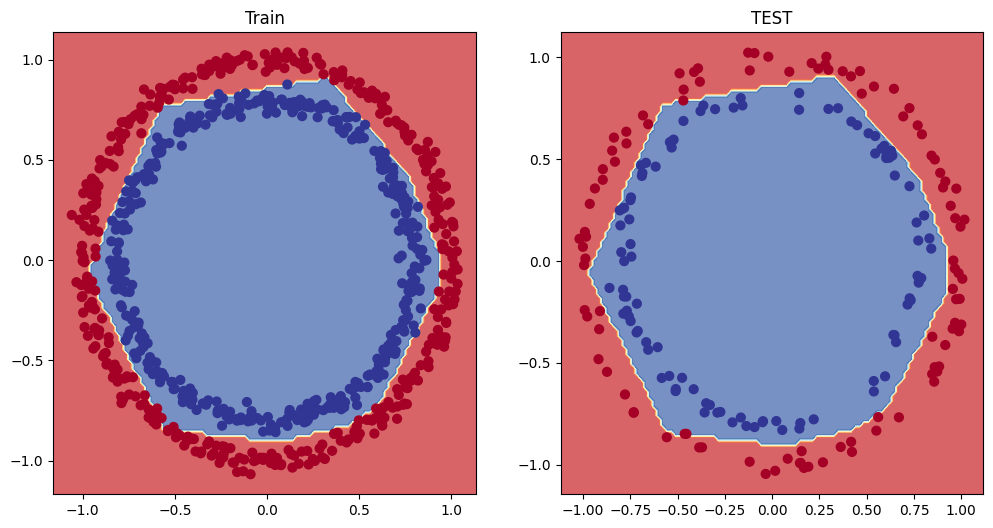

In [18]:
plt.figure(figsize = (12 , 6))
plt.subplot(1 , 2 , 1)
plt.title("Train")
plot_dicision_boundary(model_10 , x = x_train , y = y_train)
plt.subplot(1 , 2 , 2)
plt.title("TEST")
plot_dicision_boundary(model_10 , x = x_test , y= y_test)

In [19]:
#More Evaluation Metrics
#Check the accuracy
loss , accuracy = model_10.evaluate(x_test , y_test)
print(f"Model loss : {loss}")
print(f"Model accuracy : {(accuracy*100):.2f} %")


7/7 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9900
Model loss : 0.03316090255975723
Model accuracy : 99.00 %


In [20]:
import sklearn
import numpy as np

In [21]:
#How about a confusion matrix ?
from sklearn.metrics import confusion_matrix

In [22]:
y_preds = model_10.predict(x_test)
#Convert y_pred to Binary Format and view the first 10
y_preds = tf.round(y_preds)

7/7 [==============================] - 0s 3ms/step


In [23]:
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [24]:
#Make preds
#Create a confusion matrix
confusion_matrix(y_test , y_preds)

array([[99,  2],
       [ 0, 99]])

In [25]:
import numpy as np

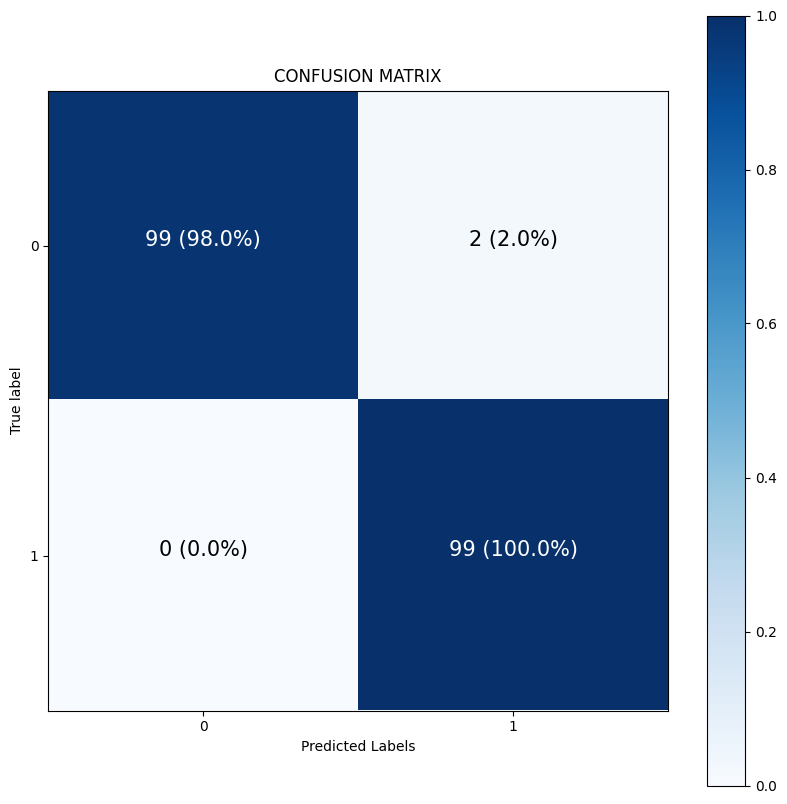

In [26]:
#Make our Confusion matrix prettier
import itertools
figsize = (10 , 10)
#Create the Confusion Matrix
cm = confusion_matrix(y_test , tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis = 1)[: , np.newaxis]
n_classes = cm.shape[0]

#preetify it
fig , ax = plt.subplots(figsize = figsize)
#Create a matrix plot
cax = ax.matshow(cm_norm , cmap = plt.cm.Blues)
fig.colorbar(cax)
#Create classes
classes = False
if classes :
  labels = classes
else:
  labels = np.arange(cm.shape[0])
  #Label the axis
  ax.set(title = "CONFUSION MATRIX" ,
         xlabel = "Predicted Labels" ,
         ylabel = "True label" ,
         xticks = np.arange(n_classes) ,
         yticks = np.arange(n_classes) ,
         xticklabels = labels ,
         yticklabels = labels ,
         )

  #set x-axis labels at bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  #Set threshold
  threshold = (cm.max() + cm.min()) / 2.
  #Plot the tect
  for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
    plt.text(j , i , f"{cm[i , j]} ({cm_norm[i , j ] *100:.1f}%)" , horizontalalignment = "center",
             color = "white" if cm[i , j] > threshold else "black" , size = 15)

In [27]:
##Working with a larger example (Multiclass Classification)



In [29]:
from tensorflow.keras.datasets import fashion_mnist
#The data is already been sorted into train_ test
(train_data , train_labels) , (test_data , test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [30]:
#Show the forst training example
print(f"Training samples :\n{train_data[0]}")
print(f"Training labels :\n{train_labels[0]}")


Training samples :
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [31]:
#Check the shape of a sigle example
train_data[0].shape , train_labels[0].shape

((28, 28), ())

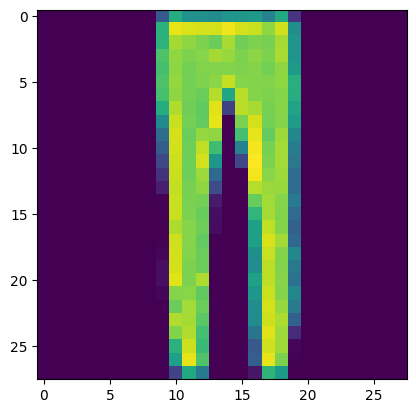

In [41]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[170]);

Text(0.5, 1.0, 'Sneaker')

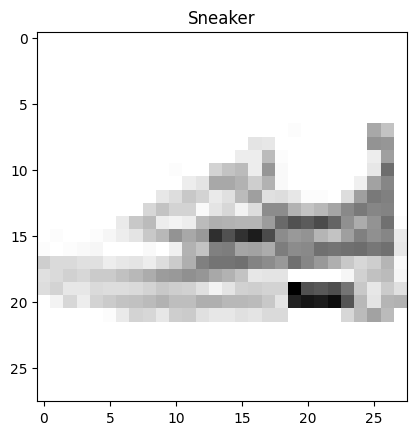

In [48]:
# Create a small list of unique classes
class_names = ["T-shirt" , "Trousers" , "Pullover" , "Dress" ,
          "Coat" , "Sandal" , "Shirt" ,"Sneaker", "Bag" ,
          "Ankel Boot"]

#Print example images and its labels
chioce = 2001
plt.imshow(train_data[chioce] , cmap = plt.cm.binary)
plt.title(class_names[train_labels[chioce]])

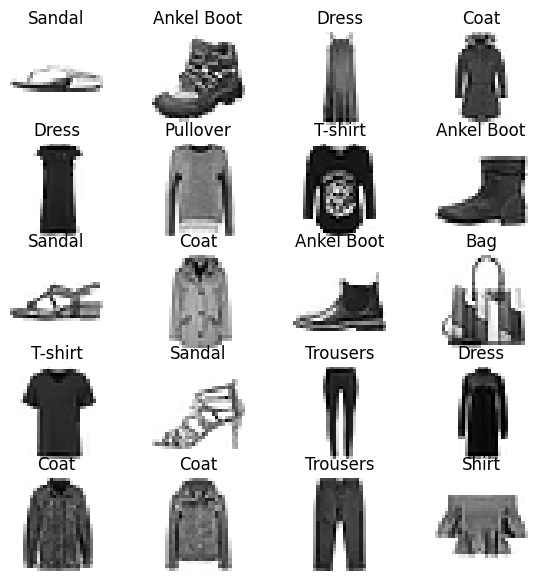

In [52]:
#Plot multiple random images of Fashion MNIST
import random
plt.figure(figsize = (7 , 7))
for i in range(20):
  ax = plt.subplot(5 , 4 , i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index] , cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building a multi-class classification model

1.   Input shape  = 28 x 28 (the shape of one image)
1.   Output shape = 10 (we have 10 classes)
2.   Output_activation_function = SoftMax
3. Loss = tf.keras.losses.CategoricalCrossEntropt
   - if ur labels are one-hot encoded , Use CategoricalCrossEntropt
   - else : if your labels are integer form use SparseCategoricalCrossEntropt



In [59]:
#Set the random seed
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),#Our data needs to be flatten
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy() ,
                 optimizer = tf.keras.optimizers.Adam() ,
                 metrics = ["accuracy"])
non_norm_history = model_11.fit(train_data , tf.one_hot(train_labels, depth = 10) ,
                                epochs = 10 ,
                                validation_data=(test_data , tf.one_hot(test_labels , depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 2.6863 - accuracy: 0.0989 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3030 - accuracy: 0.0989 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3054 - val_accur

In [60]:
#Check the model summary
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 4)                 3140      
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Check the min and max values of the training data
train_data.min() , train_data.max()

(0, 255)

In [62]:
#We can get our train and Test between 0 and 1 By dividing by the max
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.
#Check the min and max values of the scaled training data
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [64]:
#Set the random seed
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)),#Our data needs to be flatten
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                 optimizer = tf.keras.optimizers.Adam() ,
                 metrics = ["accuracy"])
norm_history = model_11.fit(train_data_norm ,train_labels,
                                epochs = 10 ,
                                validation_data=(test_data_norm , test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1194 - accuracy: 0.5946 - val_loss: 0.8326 - val_accuracy: 0.6946
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7607 - accuracy: 0.7326 - val_loss: 0.7391 - val_accuracy: 0.7495
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6828 - accuracy: 0.7632 - val_loss: 0.6892 - val_accuracy: 0.7640
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6394 - accuracy: 0.7773 - val_loss: 0.6538 - val_accuracy: 0.7770
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6134 - accuracy: 0.7852 - val_loss: 0.6441 - val_accuracy: 0.7780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5956 - accuracy: 0.7898 - val_loss: 0.6356 - val_accuracy: 0.7791
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5844 - accuracy: 0.7943 - val_loss: 0.6249 - val_accuracy:

# Note : NN tends to prefer data in numerical form as well as scaled/normalized (numbers between 0 and 1)

<Axes: title={'center': 'NORM'}>

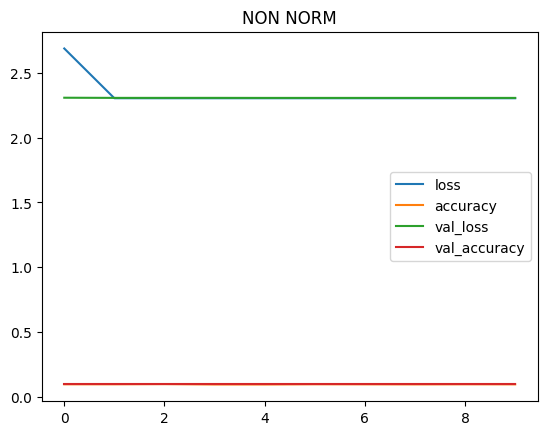

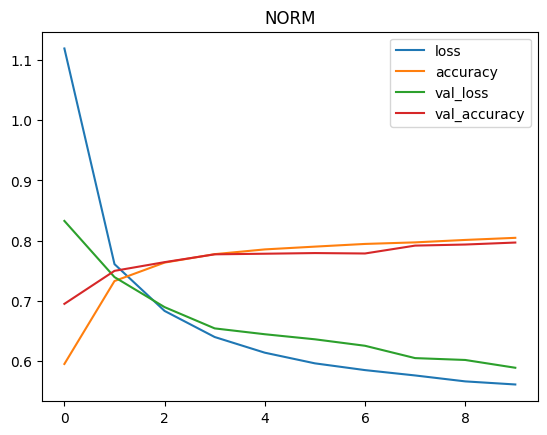

In [65]:
import pandas as pd
#Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = "NON NORM")
#Plot Normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = "NORM")

In [ ]:
#Finding the ideal Learning Rate
  #Set the Random Seed
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28 , 28]) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')

])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


#Creating the learning rate callback

lr_sch = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))


#Fit The model
find_lr_history = model_13.fit(train_data_norm ,
                               train_labels
                               , epochs = 40 ,
                               validation_data = (test_data_norm , test_labels) ,
                               callbacks = [lr_sch])







Text(0, 0.5, 'Loss Function')

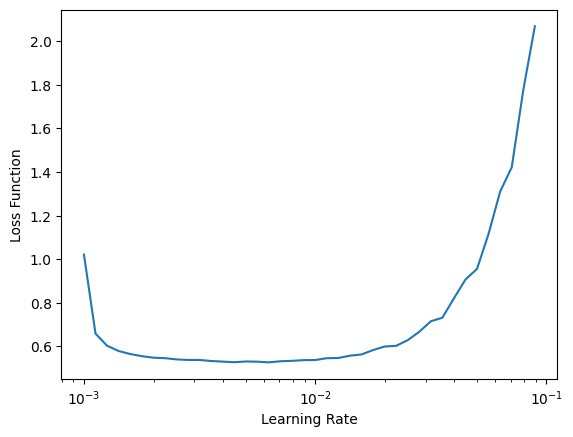

In [69]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs , find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss Function")

In [ ]:
#REFIT the model with ideal LR

  #Set the Random Seed
tf.random.set_seed(42)
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28 , 28]) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')

])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])




#Fit The model
model_14_hist = model_14.fit(train_data_norm ,
                               train_labels
                               ,epochs = 20 ,
                               validation_data = (test_data_norm , test_labels)
                              )




In [84]:
#Evaluating our model
#--> Creating Our Confusion Matrix
import itertools
from sklearn.metrics import confusion_matrix
figsize = (10 , 10)


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [76]:
#Make some pred
y_probs = model_14.predict(test_data_norm) #probs is short for prediction probabilities


313/313 [==============================] - 1s 4ms/step


In [80]:
class_names[tf.argmax(y_probs[0])]

'Ankel Boot'

In [81]:
#Convert all of predictions probabilities into ints
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 2, 6, 5, 7])

In [82]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

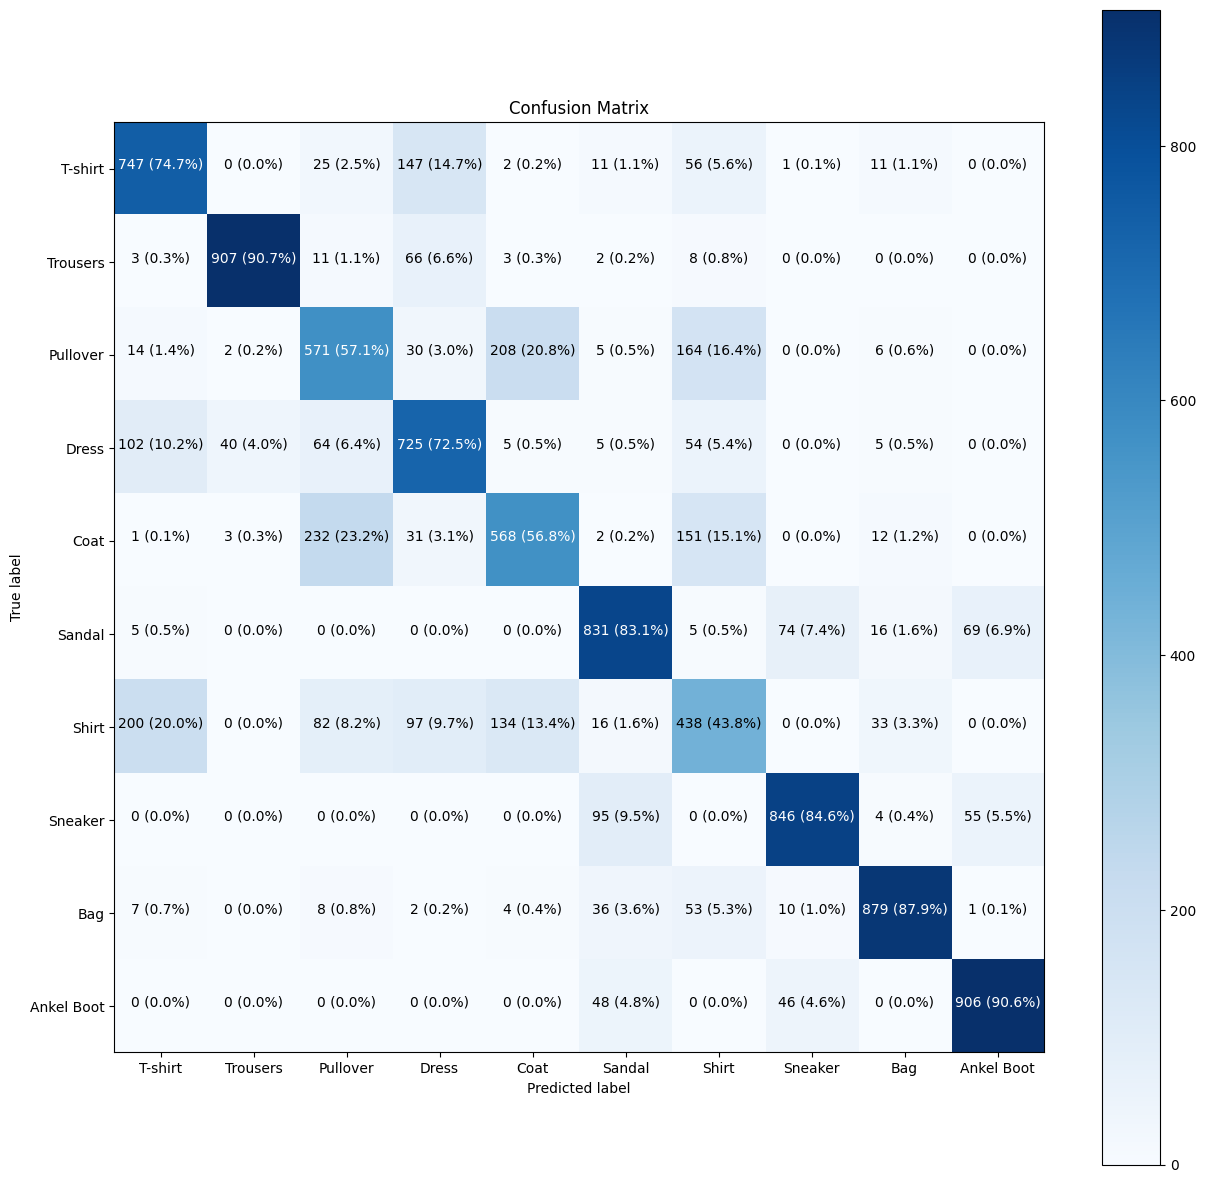

In [86]:
make_confusion_matrix(test_labels , y_preds , classes=class_names , figsize = (15 ,15) , text_size = 10)

In [100]:
import random
def plot_random_image (model, images , true_labels , classes):
  #Set random int
  i = random.randint(0 , len(images))
  #Create pred and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1 , 28 , 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  #Plot the image
  plt.imshow(target_image , cmap = plt.cm.binary)
  #Change the color of the titles fepending on if the pred is true or false
  if pred_label == true_label :
    color = 'green'
  else:
    color = 'red'
  #Add xlabel info
  plt.xlabel("Pred: {} {:2.0f}% (True: {}) ".format(pred_label ,
                                                     100*tf.reduce_max(pred_probs) ,
                                                     true_label) , color = color)

In [97]:
len(test_data)

10000

1/1 [==============================] - 0s 24ms/step


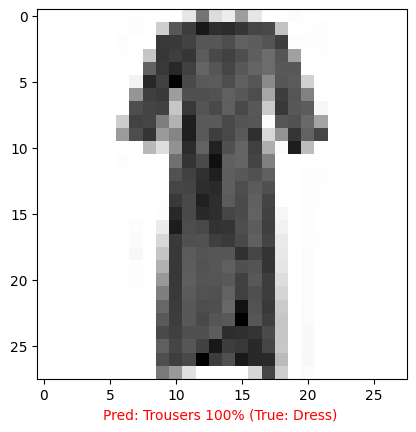

In [123]:
#Check out a random img
plot_random_image(model_14 , test_data , test_labels, class_names)

In [125]:
#What patterns is our model learning?
model_14.layers[1]

In [138]:
#Get the patterns of a layer in our NN
weights , ciases = model_14.layers[2].get_weights()
#shapes
weights , weights.shape

(array([[ 1.0622308 ,  1.1589805 ,  0.08944667, -1.6512979 ],
        [ 0.04083795, -0.78675455,  0.5830427 ,  0.4935286 ],
        [-0.3927048 , -1.1402378 ,  1.480364  ,  0.6780921 ],
        [-0.11281834, -0.28346136,  0.01282288, -0.1721714 ]],
       dtype=float32),
 (4, 4))

In [136]:
weights , biases = model_14.layers[3].get_weights()
#shapes
weights , weights.shape

(array([[ 1.5306316e-01, -1.1715769e+00, -1.4414117e+00, -1.3496630e+00,
         -8.0515867e-01, -4.9212146e-01, -2.1746694e-01,  2.5352946e-01,
          6.0856128e-01, -6.0388274e-02],
        [-1.3925666e+00,  5.3286165e-01, -4.9843309e-03, -3.1207329e-01,
         -9.1503251e-01,  6.8139619e-01, -1.3358451e+00,  3.9264181e-01,
         -8.8094324e-01,  1.1087477e+00],
        [-2.6788568e-01,  4.7265854e-01,  4.6773970e-01,  1.7788772e-01,
          4.8571512e-01, -5.9323281e-01,  1.3515235e-01, -5.4842710e-01,
         -7.0900321e-02, -1.5862784e+00],
        [ 2.4309200e-01,  8.1126016e-01, -7.7465087e-01,  4.4122300e-01,
         -3.0010304e-01, -5.1550674e+00, -3.4961975e-01, -9.8810692e+00,
         -2.7277830e-01, -9.0863180e+00]], dtype=float32),
 (4, 10))

In [139]:
biases , biases.shape

(array([ 3.4073155 , -6.0722394 , -0.05237465,  0.8377647 , -1.7329012 ,
         2.5770354 ,  2.3748314 , -2.5270612 ,  0.14078245, -2.954304  ],
       dtype=float32),
 (10,))